In [1]:
from stable_baselines3 import DQN, A2C, PPO
from mario_env_reduced import MarioEnv
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage, DummyVecEnv
from gym.wrappers import ResizeObservation
import time
import os
from imitation.algorithms import bc
import numpy as np
import pickle 

# Generate environment and wrap it
env = MarioEnv(render=False, starts = False, sticky=False, timer=20, skip=1, max_timestep=315, level='src/levels/test_levels/lvl-1_1.txt', mario_visibility=11, horizons=False)
env = ResizeObservation(env, 84)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, n_stack=4)
env = VecTransposeImage(env, skip=False)

# model = bc.reconstruct_policy("agents/bc_redo/lvl-1_3_bc_7vis_600") # Load BC agent
# model = PPO.load("agents/gail_human_reduced_5ep/gail_500000.zip") # Load GAIL agent
# model = PPO.load("agents/airl/lvl-1_1_airl_7vis_8000000.zip") # BEST REAL 1-1 
# model = PPO.load("agents/airl/lvl-1_3_air_7vis_350000.zip")

# model = bc.reconstruct_policy("agents/bc_redo/lvl-1_2_1sample_bc_7vis_1800") # Load BC agent
# model = PPO.load("agents/gail_redo/lvl-1_2_gail_7vis_1250000.zip")

# model = bc.reconstruct_policy("agents/bc_redo/ALL_bc_7vis_600") # Solves lvl-1 entirely
# model = bc.reconstruct_policy("agents/bc_redo/ALL_bc_7vis_800") # Solves lvl-1_g entirely
# model = bc.reconstruct_policy("agents/bc_redo/lvl-1_2_bc_13vis_1000") # Solves lvl-1 entirely


# model = PPO.load("agents/airl/lvl-1_1_airl_7vis_9700000.zip") # CAN solve lvl-1_1

# model = PPO.load("agents/airl/lvl-1_3_air_7vis_425000.zip") # CANT solve lvl-1_1

# model = PPO.load("agents/reduced_7x7_1000000_steps.zip")

# model=PPO.load("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/airl/lvl-1_3_airl_11vis_noh_225000.zip")

# reduced7x7, lvl-1_1_airl_11vis_noh_2000000, lvl-1_1_5samp_bc_11vis_noh_2700


all_rews = []

for i in range(30):
    # model = PPO.load("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/final/lvl-1_3_airl_11vis_noh_" + str( (i+1) * 10000) + ".zip")

    model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/final/lvl-1_1_5samp_bc_11vis_noh_" + str((i+1) * 100))
    total_reward = 0
    episodes = 5
    for j in range(episodes):
        obs = env.reset()
        done = False
        while not done:
            action = model.predict(obs, deterministic=False)
            obs, reward, done, info = env.step(action)
            total_reward += reward

            # screen = obs[0][3]
            # for y in screen[::]:
            #     for x in y[::]:
            #         print(x, end="\t")
            #     print("")

        env.close()
    print(i, total_reward/5)
    all_rews.append(total_reward/5)

# with open('lvl-1_3_airl_results.pkl', 'wb') as f:
#     pickle.dump(all_rews, f)

/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0 [-1375.1951]
1 [-1078.1277]
2 [-1520.7859]
3 [-1168.9907]
4 [-1429.9563]
5 [-1187.567]
6 [-1296.8236]
7 [-2121.0679]
8 [-1860.1041]
9 [-1603.3119]
10 [-1881.051]
11 [-1848.1511]
12 [-1383.6973]
13 [-1929.7076]
14 [-1412.9292]
15 [-869.47595]
16 [-1058.5587]
17 [-1458.1736]
18 [-838.22626]
19 [-1652.8727]
20 [-1047.7585]
21 [-904.6349]
22 [-1797.5032]
23 [-827.4418]
24 [-1122.0072]
25 [-812.2478]
26 [-702.9767]
27 [-1118.0549]
28 [-973.8247]
29 [-822.8257]


BC: 

0 [-1375.1951]
1 [-1078.1277]
2 [-1520.7859]
3 [-1168.9907]
4 [-1429.9563]
5 [-1187.567]
6 [-1296.8236]
7 [-2121.0679]
8 [-1860.1041]
9 [-1603.3119]
10 [-1881.051]
11 [-1848.1511]
12 [-1383.6973]
13 [-1929.7076]
14 [-1412.9292]
15 [-869.47595]
16 [-1058.5587]
17 [-1458.1736]
18 [-838.22626]
19 [-1652.8727]
20 [-1047.7585]
21 [-904.6349]
22 [-1797.5032]
23 [-827.4418]
24 [-1122.0072]
25 [-812.2478]
26 [-702.9767]
27 [-1118.0549]
28 [-973.8247]
29 [-822.8257]


In [8]:
from stable_baselines3 import DQN, A2C, PPO
from mario_env_reduced import MarioEnv
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage, DummyVecEnv
from gym.wrappers import ResizeObservation
import time
import os
from imitation.algorithms import bc
import numpy as np
import pickle 

# Generate environment and wrap it
env = MarioEnv(render=False, starts = False, sticky=False, timer=30, skip=1, horizons=False, max_timestep=350, level='src/levels/test_levels/lvl-1.txt', mario_visibility=11, random=False)
env = ResizeObservation(env, 84)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, n_stack=4)
env = VecTransposeImage(env, skip=False)

# model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/bc_redo/ALL_bc_7vis_600") # Load BC agent

# model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/final/lvl-1_1_5samp_bc_11vis_noh_2700") # Best BC Agent (11vis)
# model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/test_lvl-2_4000") 
# model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/test_lvl-3_2000")

# model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/test_lvl-2-3_2300")


all_rewards = []
all_completions = []
all_goombas = []

for a in range(10 *3):
    # model = PPO.load("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/reduced_7x7_" +str((a+1)*25000) + "_steps.zip")
    model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/agents/final2/lvl-1_all_1samp_bc_11vis_noh_" + str((i+1) * 100))

    rewards = []
    completions = []
    goombas = []

    for i in range(1):
        episodes = 5
        # model = bc.reconstruct_policy("/home/mikeg/Documents/CMPUT652FinalProject/CMPUT652FinalProject/Mario-AI-Framework/test_lvl-2-3_"+ str((20+21) * 50))

        for j in range(episodes):
        # end = False
        # while(not end):
            obs = env.reset()
            done = False
            total_rew = 0
            while not done:
            # for k in range(30):
                action = model.predict(obs, deterministic=False)
                obs, reward, done, info = env.step(action)
                total_rew += reward
                # time.sleep(0.5)
            env.close()
            # print("Completion: ", info[0]['completion'])
            # print("Kills: ", info[0]['g'])
            # print("Reward: ", total_rew)
            rewards.append(total_rew)
            completions.append(info[0]['completion'])
            goombas.append(info[0]['g']/15) # 4 in lvl-1_1, 15 in lvl-1

    print(a, np.average(np.array(rewards)))
    print(a, np.average(np.array(completions)))
    print(a, np.average(np.array(goombas)))

    all_rewards.append(np.array(rewards))
    all_completions.append(np.array(completions))
    all_goombas.append(np.array(goombas))

# with open('agent_results/lvl-1_1_gail_rewards', 'wb') as f:
#     pickle.dump(all_rewards, f)

# with open('agent_results/lvl-1_1_gail_completions', 'wb') as f:
#     pickle.dump(all_completions, f)

# with open('agent_results/lvl-1_1_gail_goombas', 'wb') as f:
#     pickle.dump(all_goombas, f)

Completion:  0.22746676206588745
Kills:  0.0
Reward:  [81.04913]
Completion:  0.5251436829566956
Kills:  1.0
Reward:  [189.06604]
Completion:  0.6100523471832275
Kills:  1.0
Reward:  [-2806.4258]
Completion:  0.5163407325744629
Kills:  1.0
Reward:  [122.82727]
Completion:  0.5251436829566956
Kills:  1.0
Reward:  [-646.4]
Completion:  0.6118484735488892
Kills:  2.0
Reward:  [-408.28864]
Completion:  0.6138307452201843
Kills:  2.0
Reward:  [-1275.8848]
Completion:  0.2223857343196869
Kills:  0.0
Reward:  [72.47296]
Completion:  0.6052364706993103
Kills:  2.0
Reward:  [-3129.2842]
Completion:  1.0
Kills:  3.0
Reward:  [-1404.666]
Completion:  0.21532602608203888
Kills:  0.0
Reward:  [40.1279]
Completion:  0.5251436829566956
Kills:  1.0
Reward:  [4.5907593]
Completion:  0.22533155977725983
Kills:  0.0
Reward:  [88.40622]
Completion:  0.6135420799255371
Kills:  2.0
Reward:  [-443.448]
Completion:  0.210905060172081
Kills:  0.0
Reward:  [36.752625]
Completion:  0.6515804529190063
Kills:  4.0

In [26]:
np.min(all_rewards, axis=1).reshape(5)

array([   27.388489, -3167.      , -3343.5361  , -3343.0024  ,
       -3167.      ], dtype=float32)

In [18]:
(np.array(range(40), dtype=int) + 1) * 25000

array([  25000,   50000,   75000,  100000,  125000,  150000,  175000,
        200000,  225000,  250000,  275000,  300000,  325000,  350000,
        375000,  400000,  425000,  450000,  475000,  500000,  525000,
        550000,  575000,  600000,  625000,  650000,  675000,  700000,
        725000,  750000,  775000,  800000,  825000,  850000,  875000,
        900000,  925000,  950000,  975000, 1000000])

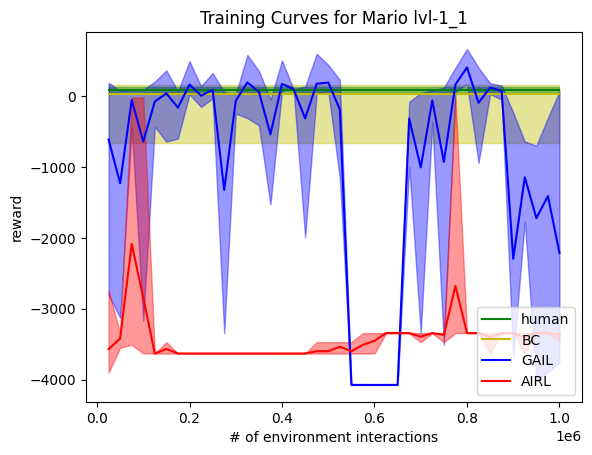

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('agent_results/lvl-1_1_bc_rewards', 'rb') as f:
    bc_rews = pickle.load(f)

with open('agent_results/lvl-1_1_human_rewards', 'rb') as f:
    human_rews = pickle.load(f)

with open('agent_results/lvl-1_1_gail_rewards', 'rb') as f:
    gail_rews = pickle.load(f)


with open('agent_results/lvl-1_1_airl_rewards', 'rb') as f:
    airl_rews = pickle.load(f)

# plt.plot(np.array(rews))
x = (np.array(range(40)) + 1) * 25000

plt.plot(x, [np.average(human_rews)] * 40, color='g')
plt.plot(x, [np.average(bc_rews)] * 40, color='y')
plt.plot(x, np.average(gail_rews, axis=1), color='b')
plt.plot(x, np.average(airl_rews, axis=1), color='r')


plt.fill_between(x, [np.max(bc_rews)] * 40, [np.min(bc_rews)] * 40, alpha=0.4, color='y')

plt.fill_between(x, [np.max(human_rews)] * 40, [np.min(human_rews)] * 40, alpha=0.4, color='g')
plt.fill_between(x, np.max(gail_rews, axis=1).reshape(40), np.min(gail_rews, axis=1).reshape(40), alpha=0.4, color='b')




plt.fill_between(x, np.max(airl_rews, axis=1).reshape(40), np.min(airl_rews, axis=1).reshape(40), alpha=0.4, color='r')

plt.title('Training Curves for Mario lvl-1_1')
plt.xlabel('# of environment interactions')
plt.ylabel("reward")
plt.legend(['human', 'BC', 'GAIL', 'AIRL'], loc='lower right')